<a href="https://colab.research.google.com/github/vupadhayayula/ML_Projects/blob/main/plant_disease_recoginition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset
!unzip /content/plant-disease-recognition-dataset.zip

cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset
License(s): CC0-1.0
 98% 1.23G/1.25G [00:08<00:00, 162MB/s]
100% 1.25G/1.25G [00:08<00:00, 159MB/s]
Archive:  /content/plant-disease-recognition-dataset.zip
  inflating: Test/Test/Healthy/8ddaa5a5caa5caa8.jpg  
  inflating: Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg  
  inflating: Test/Test/Healthy/8ddd5ec1c0de38c4.jpg  
  inflating: Test/Test/Healthy/8def3f60308ab41b.jpg  
  inflating: Test/Test/Healthy/8def4d91382175c3.jpg  
  inflating: Test/Test/Healthy/8df452e2e38c0b6e.jpg  
  inflating: Test/Test/Healthy/8dfae9d78cc32089.jpg  
  inflating: Test/Test/Healthy/8e3dbccdfe08c850.jpg  
  inflating: Test/Test/Healthy/8e68163c62dc57d5.jpg  
  inflating: Test/Test/Healthy/8e6a823cce9ff40c.jpg  
  inflating: Test/Test/Healthy/8e77857194a59a87.jpg  
  inflating: Test/Test/Healthy/8e79802b3fb770c8.jpg  
  inflating: Test/Test/Healthy/8e7986d1e

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale =1./255,zoom_range=0.2,horizontal_flip = True)

In [4]:
test_datagen = ImageDataGenerator(rescale =1./255)

In [8]:
x_train = train_datagen.flow_from_directory('/content/Train/Train',
                                            target_size=(225,225),
                                            class_mode = 'categorical',
                                            batch_size = 32)

Found 1322 images belonging to 3 classes.


In [9]:
x_test = test_datagen.flow_from_directory('/content/Test/Test',
                                            target_size=(225,225),
                                            class_mode = 'categorical',
                                            batch_size = 32)

Found 150 images belonging to 3 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D,Flatten,Dense

In [11]:

# adding layers

model = Sequential()

model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(225,225,3)))  #convolution layer
model.add(MaxPooling2D(pool_size =(2,2)))  # maxpooling layer
model.add(Flatten())  # flatten layer

model.add(Dense(300,activation ='relu')) # hidden layer 1
model.add(Dense(150,activation ='relu')) # hidden layer 2

model.add(Dense(3,activation ='softmax')) # output layer

In [12]:
# compile the model
model.compile(optimizer = 'adam',loss= 'categorical_crossentropy',metrics =['accuracy'])
print(f"Steps per epoch: {len(x_train)}")
print(f"Validation steps: {len(x_test)}")

Steps per epoch: 42
Validation steps: 5


In [14]:
model.fit(
    x_train,
    batch_size=16,

    epochs=10,
    validation_data=x_test,
    validation_batch_size=16
)

Epoch 1/10
42/42 [==============================] - 105s 2s/step - loss: 6.2563 - accuracy: 0.4539 - val_loss: 0.7617 - val_accuracy: 0.6600
Epoch 2/10
42/42 [==============================] - 112s 3s/step - loss: 0.5033 - accuracy: 0.7761 - val_loss: 0.8816 - val_accuracy: 0.6733
Epoch 3/10
42/42 [==============================] - 102s 2s/step - loss: 0.3999 - accuracy: 0.8396 - val_loss: 0.7427 - val_accuracy: 0.7333
Epoch 4/10
42/42 [==============================] - 109s 3s/step - loss: 0.3395 - accuracy: 0.8714 - val_loss: 0.5040 - val_accuracy: 0.8267
Epoch 5/10
42/42 [==============================] - 101s 2s/step - loss: 0.2976 - accuracy: 0.9002 - val_loss: 0.7219 - val_accuracy: 0.7067
Epoch 6/10
42/42 [==============================] - 102s 2s/step - loss: 0.2627 - accuracy: 0.9085 - val_loss: 0.6271 - val_accuracy: 0.7800
Epoch 7/10
42/42 [==============================] - 108s 3s/step - loss: 0.2444 - accuracy: 0.9092 - val_loss: 0.6331 - val_accuracy: 0.7800
Epoch 8/10
42

In [15]:
model.save('plant.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [17]:
img = image.load_img('/content/Validation/Validation/Powdery/9a9a6c25795d9e42.jpg',target_size =(225,225))

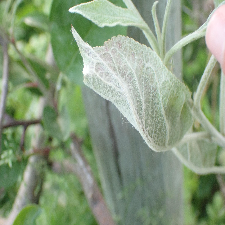

In [18]:
img

In [19]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
x = x / 255.0
pred =np.argmax(model.predict(x))
op =['Healthy','Powdery','Rust']
op[pred]

1/1 [==============================] - 1s 779ms/step


'Powdery'